In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tqdm import tqdm

In [4]:
tf.feature_column.categorical_column_with_vocabulary_list?

In [5]:
PATH = '../input/'
test = pd.read_csv(f'{PATH}test.csv')
print(test.shape)
test.tail()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [62]:
train = pd.read_csv(f'{PATH}train.csv')
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train['HasCabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [65]:
1e-3

0.001

In [17]:
kf = KFold(5)

In [18]:
df = pd.DataFrame({
    'Age': train['Age'].fillna(0)
})
data = kf.split(df)

In [19]:
splits = [d for d in data]

In [20]:
len(splits)

5

In [21]:
len(splits[0])

2

In [23]:
train_split, test_split = splits[0]

In [31]:
df.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [36]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [56]:
import time

In [57]:
time.tim()

1531590862.8291829

In [59]:
import time
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))

--- 9.989738464355469e-05 seconds ---


In [ ]:
tf.estimator.DNNClassifier()

In [60]:
1e-1

0.1

In [61]:
1e-2

0.01

In [37]:
train['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [39]:
test['FamilySize'].unique()

array([ 1,  2,  3,  5,  4,  6,  8,  7, 11])

In [51]:
family_sizes = sorted(list(set(list(test['FamilySize'].values) + list(train['FamilySize'].values))))
family_sizes

[1, 2, 3, 4, 5, 6, 7, 8, 11]

In [52]:
max(family_sizes)

11

In [53]:
min(family_sizes)

1

In [54]:
np.max(family_sizes)

11

In [55]:
np.min(family_sizes)

1

[1,
 2,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 5,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 4,
 6,
 1,
 6,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 8,
 8,
 1,
 5,
 1,
 1,
 4,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 3,
 7,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 7,
 3,
 1,
 2,
 4,
 3,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 3,
 11,
 1,
 2,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 7,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 2,
 1,
 3,
 2,
 2,

In [46]:
test['FamilySize'].values

array([ 1,  2,  1,  1,  3,  1,  1,  3,  1,  3,  1,  1,  2,  2,  2,  2,  1,
        1,  2,  1,  2,  2,  1,  2,  5,  2,  2,  1,  1,  3,  2,  3,  4,  4,
        2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  3,  2,
        1,  4,  6,  1,  6,  1,  1,  2,  1,  1,  1,  1,  1,  5,  1,  1,  1,
        1,  6,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  3,  2,  1,  1,  1,
        2,  1,  1,  1,  3,  2,  1,  4,  1,  1,  1,  2,  1,  1,  1,  2,  2,
        1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  1,  3,  1,
        2,  1,  2,  2,  1,  1,  2,  1,  3,  1,  1,  1,  1,  5,  2,  1,  1,
        1,  1,  1,  8,  8,  1,  5,  1,  1,  4,  1,  1,  1,  3,  2,  1,  1,
        3,  7,  1,  1,  1,  1,  3,  1,  3,  1,  1,  1,  3,  1,  5,  1,  1,
        1,  1,  2,  1,  7,  3,  1,  2,  4,  3,  1,  3,  2,  1,  3,  1,  2,
        3, 11,  1,  2,  1,  3,  1,  3,  1,  3,  1,  1,  1,  1,  3,  2,  3,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  7,  1,  1,  3,  3,  1,  2,
        1,  1,  1,  1,  3

In [ ]:
train['FamilySize']

In [27]:
df.iloc[train_split][:3]

,Age
179,36.0
180,0.0
181,0.0


In [28]:
type(df.iloc[train_split])

pandas.core.frame.DataFrame

In [29]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
arr = np.array([1])
arr

array([1])

In [16]:
type(arr)

numpy.ndarray

In [13]:
for d in data:
    print(d)

(array([179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334,
       335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347,
       348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 3

In [63]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 500 # 1000 - orig value
display_step = 50

##  Model with Age as the only feature

In [34]:
print('train Age is NaN:', len(train[train['Age'].isnull()]))
print('test Age is NaN:', len(test[test['Age'].isnull()]))

train Age is NaN: 177
test Age is NaN: 86


In [36]:
n_samples = train.shape[0]
n_samples

891

In [47]:
train_split = .8
index_split = int(n_samples*train_split)
train_slice = slice(0, index_split)
test_slice = slice(index_split, n_samples)

In [48]:
index_split

712

In [49]:
train_slice

slice(0, 712, None)

In [50]:
test_slice

slice(712, 891, None)

In [51]:
train[train_slice].shape

(712, 12)

In [52]:
train[test_slice].shape

(179, 12)

In [55]:
train[train_slice].shape[0] + train[test_slice].shape[0] == train.shape[0] 

True

In [56]:
# separated train and dev sets
train_set = train[train_slice]
dev_set = train[test_slice]

In [58]:
train_Y = train_set['Survived']
train_X = train_set['Age'].fillna(0)

In [59]:
test_Y = dev_set['Survived']
test_X = dev_set['Age'].fillna(0)

In [60]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

 10%|█         | 50/500 [00:17<02:38,  2.84it/s]

Epoch: 0050 cost= 0.096238315 W= 0.002099392 b= 0.30494028


 20%|██        | 100/500 [00:34<02:18,  2.90it/s]

Epoch: 0100 cost= 0.095947526 W= 0.0017851344 b= 0.31709555


 30%|███       | 150/500 [00:52<02:02,  2.87it/s]

Epoch: 0150 cost= 0.095729865 W= 0.0015128709 b= 0.32762647


 40%|████      | 200/500 [01:10<01:45,  2.85it/s]

Epoch: 0200 cost= 0.095566951 W= 0.001276846 b= 0.3367556


 50%|█████     | 250/500 [01:29<01:29,  2.80it/s]

Epoch: 0250 cost= 0.095445015 W= 0.0010721893 b= 0.34467152


 60%|██████    | 300/500 [01:51<01:14,  2.70it/s]

Epoch: 0300 cost= 0.095353857 W= 0.00089486165 b= 0.35153052


 70%|███████   | 350/500 [02:11<00:56,  2.66it/s]

Epoch: 0350 cost= 0.095285811 W= 0.0007410861 b= 0.3574782


 80%|████████  | 400/500 [02:28<00:37,  2.70it/s]

Epoch: 0400 cost= 0.095235005 W= 0.0006078129 b= 0.36263293


 90%|█████████ | 450/500 [02:44<00:18,  2.73it/s]

Epoch: 0450 cost= 0.095197223 W= 0.00049252843 b= 0.3670922


100%|██████████| 500/500 [03:02<00:00,  2.74it/s]

Epoch: 0500 cost= 0.095169045 W= 0.00039239897 b= 0.37096506
Optimization Finished!
Training cost= 0.095169045 W= 0.00039239897 b= 0.37096506 



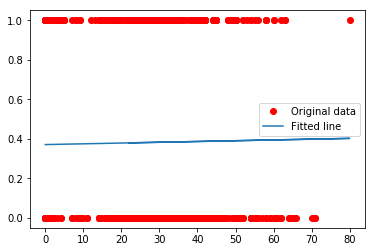

Testing... (Mean square loss Comparison)
Testing cost= 0.11487875
Absolute mean square loss difference: 0.019709706


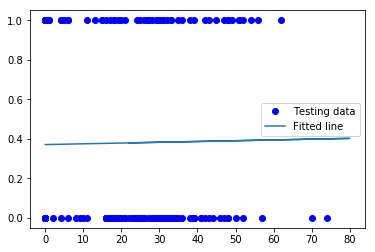

In [66]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in tqdm(range(training_epochs)):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    # NOTE: my testing sample is above

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

## try with pre-built estimators

In [76]:
numeric_column_age = tf.feature_column.numeric_column(key='Age')
my_feature_columns = [
    numeric_column_age
]

In [77]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two hidden layers of 10 nodes each.
    hidden_units=[10, 10],
    # The model must choose between 3 classes.
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/k5/bp3zwqms0bx9sp3p4mfl4vf80000gn/T/tmpei3pm65d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x122041470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [78]:
def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)

    # Return the read end of the pipeline.
    return dataset.make_one_shot_iterator().get_next()

In [79]:
train_Y = train_set['Survived']
train_X = train_set['Age'].fillna(0)

train_x = {'Age': train_X}
train_y = train_Y

test_Y = dev_set['Survived']
test_X = dev_set['Age'].fillna(0)

test_x = {'Age': test_X}
test_y = test_Y

In [80]:
batch_size = 50
train_steps = batch_size * 10

classifier.train(
    input_fn=lambda:train_input_fn(train_x, train_y,
                                             batch_size),
    steps=train_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/k5/bp3zwqms0bx9sp3p4mfl4vf80000gn/T/tmpei3pm65d/model.ckpt.
INFO:tensorflow:loss = 589.6355, step = 1
INFO:tensorflow:global_step/sec: 407.546
INFO:tensorflow:loss = 30.52214, step = 101 (0.246 sec)
INFO:tensorflow:global_step/sec: 798.5
INFO:tensorflow:loss = 32.952873, step = 201 (0.127 sec)
INFO:tensorflow:global_step/sec: 677.002
INFO:tensorflow:loss = 36.1003, step = 301 (0.146 sec)
INFO:tensorflow:global_step/sec: 749.564
INFO:tensorflow:loss = 34.59201, step = 401 (0.133 sec)
INFO:tensorflow:Saving checkpoints for 500 into /var/folders/k5/bp3zwqms0bx9sp3p4mfl4vf80000gn/T/tmpei3pm65d/model.ckpt.
INFO:tensorflow:Loss for final step: 31.541037.


In [81]:
def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the read end of the pipeline.
    return dataset.make_one_shot_iterator().get_next()

In [82]:
eval_result = classifier.evaluate(
    input_fn=lambda:eval_input_fn(test_x, test_y,
                                  batch_size))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-07-15:42:00
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/k5/bp3zwqms0bx9sp3p4mfl4vf80000gn/T/tmpei3pm65d/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-07-15:42:01
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.6424581, accuracy_baseline = 0.6424581, auc = 0.5485734, auc_precision_recall = 0.46655834, average_loss = 0.64650023, global_step = 500, label/mean = 0.3575419, loss = 28.930885, precision = 0.0, prediction/mean = 0.3707991, recall = 0.0


In [83]:
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


Test set accuracy: 0.642



## Next

add more features

try in a script format, instead of NB

### check label counts

In [87]:
train_survived_count = train[['PassengerId', 'Survived']].groupby(['Survived']).agg(['count'])
train_survived_count

,PassengerId
,count
Survived,
0,549
1,342


In [89]:
train_survived_count.keys()

MultiIndex(levels=[['PassengerId'], ['count']],
           labels=[[0], [0]])

In [95]:
train_survived_count['PassengerId']['count']

Survived
0    549
1    342
Name: count, dtype: int64

In [97]:
survived_0 = train_survived_count['PassengerId']['count'][0]
survived_1 = train_survived_count['PassengerId']['count'][1]

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train_copy = train.copy()
y = train_copy.pop('Survived')
type(y)

pandas.core.series.Series

In [74]:
type(train_copy)

pandas.core.frame.DataFrame

In [68]:
train_X

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       0.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      0.0
18     31.0
19      0.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      0.0
27     19.0
28      0.0
29      0.0
       ... 
682    20.0
683    14.0
684    60.0
685    25.0
686    14.0
687    19.0
688    18.0
689    15.0
690    31.0
691     4.0
692     0.0
693    25.0
694    60.0
695    52.0
696    44.0
697     0.0
698    49.0
699    42.0
700    18.0
701    35.0
702    18.0
703    25.0
704    26.0
705    39.0
706    45.0
707    42.0
708    22.0
709     0.0
710    24.0
711     0.0
Name: Age, Length: 712, dtype: float64

In [13]:
df.to_csv('test.csv', index=False)
df.tail()

{type(t) for t in df['Age'].values}

{numpy.float64}

In [10]:
examples = df.shape[0]
train = int(examples * .8)
validation = examples - train

print('train:', train)
print('validation:', validation)

train: 712
validation: 179


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
for column in df.columns:
    #if column not in ('PassengerId' 'Name'):
    print(column, df[column].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

In [83]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [92]:
# male = 1; female = 0
le_sex = LabelEncoder().fit_transform(df['Sex'])
print(le_sex[:4])
print(df['Sex'][:4])

[1 0 0 0]
0      male
1    female
2    female
3    female
Name: Sex, dtype: object


In [97]:
le_age = StandardScaler().fit_transform(df['Age'].fillna(0)[:, None])
print(le_age.size)

891


In [99]:
le_fare = StandardScaler().fit_transform(df['Fare'][:, None])

In [110]:
types = set()
for x in df['Cabin'].fillna('').unique():
    types.add(type(x))
types

le_cabin = LabelEncoder().fit_transform(df['Cabin'].fillna(''))

In [113]:
le_embarked = LabelEncoder().fit_transform(df['Embarked'].fillna(''))

In [122]:
# le_sex
# le_age
# le_fare
# le_cabin
# le_embarked
# df['Pclass']
# df['SibSp']
# df['Parch']

le_age = np.squeeze(le_age)
le_fare = np.squeeze(le_fare)

for idx, x in enumerate([le_sex, le_age, le_fare, le_cabin, le_embarked ,df['Pclass'], df['SibSp'], df['Parch']]):
    print(idx, x.shape, type(x))

0 (891,) <class 'numpy.ndarray'>
1 (891,) <class 'numpy.ndarray'>
2 (891,) <class 'numpy.ndarray'>
3 (891,) <class 'numpy.ndarray'>
4 (891,) <class 'numpy.ndarray'>
5 (891,) <class 'pandas.core.series.Series'>
6 (891,) <class 'pandas.core.series.Series'>
7 (891,) <class 'pandas.core.series.Series'>


In [121]:
print(le_age.shape)
np.squeeze(le_age).shape

(891, 1)


(891,)

In [15]:
columns_to_ignore = ('PassengerId', 'Name', 'Ticket')

for column in df.columns:
    if column not in columns_to_ignore:
        print(column, df[column].unique())

Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
Age [ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Fare [   7.25     71.2833    7.925    53.1       8.05      8.4583   51.8625
   21.075    11.1333   30.0708   16.7      26.55     31.275     7.8542
   16.       29.125    13.       18.        7.225    26.        8.0292
   35.5      31.3875  263.        7.8792    7.8958   27.7208  1

In [37]:
VALID = df.shape[0] // 9 # 1/9th will be "dev set" data

In [130]:
# all_df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
# test_df = all_df[:-VALID]
# dev_df = all_df[:VALID]

all_df = np.array([le_sex, le_age, le_fare, le_cabin, le_embarked ,df['Pclass'], df['SibSp'], df['Parch']])

test_df = np.array([x[:-VALID] for x in all_df])
dev_df = np.array([x[:VALID] for x in all_df])


print(test_df.shape)
print(dev_df.shape)

(8, 792)
(8, 99)


In [152]:
# 2nd attempt

# Specify that all features have real-value data
feature_columns = [tf.feature_column.numeric_column("x", shape=[8])]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                        hidden_units=[10, 20, 10],
                                        n_classes=3,
                                        model_dir="/tmp/titanic")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/titanic', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x116dc0be0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [155]:
# Define the training inputs
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(test_df.T)},
    y=np.array(df['Survived'][:-VALID]),
    num_epochs=None,
    shuffle=True)

In [156]:
# Train model.
classifier.train(input_fn=train_input_fn, steps=200)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/titanic/model.ckpt-2003


InvalidArgumentError: tensor_name = dnn/hiddenlayer_0/kernel; shape in shape_and_slice spec [8,10] does not match the shape stored in checkpoint: [1,10]
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]

Caused by op 'save/RestoreV2_2', defined at:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-156-de24f59589fa>", line 2, in <module>
    classifier.train(input_fn=train_input_fn, steps=200)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/estimator/estimator.py", line 302, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/estimator/estimator.py", line 780, in _train_model
    log_step_count_steps=self._config.log_step_count_steps) as mon_sess:
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 368, in MonitoredTrainingSession
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 673, in __init__
    stop_grace_period_secs=stop_grace_period_secs)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 493, in __init__
    self._sess = _RecoverableSession(self._coordinated_creator)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 851, in __init__
    _WrappedSession.__init__(self, self._create_session())
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 856, in _create_session
    return self._sess_creator.create_session()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 554, in create_session
    self.tf_sess = self._session_creator.create_session()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 419, in create_session
    self._scaffold.finalize()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/monitored_session.py", line 212, in finalize
    self._saver.build()
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 745, in _build_internal
    restore_sequentially, reshape)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 470, in _AddShardedRestoreOps
    name="restore_shard"))
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/aaron/Documents/ml/kaggle/digit-recognizer/venv/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): tensor_name = dnn/hiddenlayer_0/kernel; shape in shape_and_slice spec [8,10] does not match the shape stored in checkpoint: [1,10]
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save/Const_0_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]


In [81]:
# Define the test inputs
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(dev_df['Age'].values)},
    y=np.array(dev_df['Survived'].fillna(0).values),
    num_epochs=1,
    shuffle=False)

# Evaluate accuracy.
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]

print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

INFO:tensorflow:Starting evaluation at 2018-01-13-22:48:36
INFO:tensorflow:Restoring parameters from /tmp/titanic/model.ckpt-2003
INFO:tensorflow:Finished evaluation at 2018-01-13-22:48:37
INFO:tensorflow:Saving dict for global step 2003: accuracy = 0.585859, accuracy_baseline = 0.585859, auc = 0.485702, auc_precision_recall = 0.427263, average_loss = 0.69295, global_step = 2003, label/mean = 0.414141, loss = 68.6021, prediction/mean = 0.37602

Test Accuracy: 0.585859



In [216]:
# Specify that all features have real-value data
feature_columns = [tf.feature_column.numeric_column("x", shape=[8])]

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                      hidden_units=[10, 20, 10],
                                      n_classes=2,
                                      model_dir="/tmp/titanic2")
# Define the training inputs
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(test_df.T)},
    y=np.array(df['Survived'][:-VALID]),
    num_epochs=None,
    shuffle=True)

# Train model.
classifier.train(input_fn=train_input_fn, steps=2000)

# Define the test inputs
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(dev_df.T)},
    y=np.array(df['Survived'][:VALID]),
    num_epochs=1,
    shuffle=False)

# Evaluate accuracy.
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/titanic2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11c7b9710>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/titanic2/model.ckpt-4000
INFO:tensorflow:Saving checkpoints for 4001 into /tmp/titanic2/model.ckpt.
INFO:tensorflow:loss = 36.6297, step = 4001
INFO:tensorflow:global_step/sec: 527.582
INFO:tensorflow:loss = 50.2115, step = 4101 (0.191 sec)
INFO:tensorflow:global_step/sec: 584.003
INFO:tensorflow:loss = 54.9796, step = 4201 (0.171 sec

In [217]:
accuracy_score

0.87878788

In [212]:
pdf = pd.read_csv('test.csv')

ple_sex = LabelEncoder().fit_transform(pdf['Sex'])
ple_age = StandardScaler().fit_transform(pdf['Age'].fillna(0)[:, None])
ple_fare = StandardScaler().fit_transform(pdf['Fare'].fillna(0)[:, None])
ple_cabin = LabelEncoder().fit_transform(pdf['Cabin'].fillna(''))
ple_embarked = LabelEncoder().fit_transform(pdf['Embarked'].fillna(''))

ple_age = np.squeeze(ple_age)
ple_fare = np.squeeze(ple_fare)

pall_pdf = np.array([ple_sex, ple_age, ple_fare, ple_cabin, ple_embarked ,pdf['Pclass'], pdf['SibSp'], pdf['Parch']])

print(pall_pdf.T.shape)

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": pall_pdf.T},
    num_epochs=1,
    shuffle=False)

predictions = classifier.predict(input_fn=predict_input_fn)
# predicted_classes = [p["classes"] for p in predictions]

(418, 8)


In [213]:
predicted_classes = [p["classes"][0].decode('utf8') for p in predictions]

INFO:tensorflow:Restoring parameters from /tmp/titanic2/model.ckpt-4000


In [214]:
# results = [int(x[0].decode('utf8') for x in predicted_classes)]

predicted_classes

['0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0'

In [215]:
submission = pd.DataFrame(data={'PassengerId': pdf['PassengerId'], 'Survived': predicted_classes})
submission.to_csv('submission.csv', index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [205]:
len(predicted_classes)

418

In [20]:
submission.head()

NameError: name 'submission' is not defined

In [24]:
import csv

filename = "input/csv_test_data.csv"

with open(filename, 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerow(['A', 'B', 'C', 'D', 'E'])
    for i in range(5):
        spamwriter.writerow([0, 0, 0, 0, 0])

In [44]:
from __future__ import print_function
import tensorflow as tf

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

# setup text reader
file_length = file_len(filename)
filename_queue = tf.train.string_input_producer([filename])
reader = tf.TextLineReader(skip_header_lines=1)
_, csv_row = reader.read(filename_queue)

# setup CSV decoding
record_defaults = [[0],[0],[0],[0],[0]]
col1,col2,col3,col4,col5 = tf.decode_csv(csv_row, record_defaults=record_defaults)

# turn features back into a tensor
features = tf.stack([col1,col2,col3,col4])

print("loading, " + str(file_length) + " line(s)\n")
with tf.Session() as sess:
  tf.initialize_all_variables().run()

  # start populating filename queue
  coord = tf.train.Coordinator()
  threads = tf.train.start_queue_runners(coord=coord)

  for i in range(file_length):
    # retrieve a single instance
    example, label = sess.run([features, col5])
    print(example, label)

  coord.request_stop()
  coord.join(threads)
  print("\ndone loading")

loading, 6 line(s)

[0 0 0 0] 0
[0 0 0 0] 0
[0 0 0 0] 0
[0 0 0 0] 0
[0 0 0 0] 0
[0 0 0 0] 0

done loading


In [38]:
e = example
e

array([0, 0, 0, 0], dtype=int32)

In [41]:
np.array([e, e])

array([[0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int32)

In [43]:
np.put?

In [1]:
!pwd

/Users/aaron/Documents/ml/kaggle/titanic
